# Курс ["Алгоритмы анализа данных"](https://gb.ru/lessons/177362)

# Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

## Задание 1.

### Сгенерировать датасет при помощи `sklearn.datasets.make_regression` 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
X, y, coef = datasets.make_regression(n_samples=100, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

### Обучить линейную модель при помощи градиентного спуска и либо стохастического градиентного спуска, либо mini-batch градиентного спуска

In [3]:
from myalglib import MyGD, MySGD, MyMiniBatchGD

Сначала обучим обычную линейную регрессию с сырыми, нормализованными и стандартизированными данными:

In [4]:
%time

lr = MyGD(iter_num=1e4, random_seed=42)
lr.fit(X, y)

lr_nrm = MyGD(iter_num=1e4, random_seed=42, scaler='normal')
lr_nrm.fit(X, y)

lr_std = MyGD(iter_num=1e4, random_seed=42, scaler='standart')
lr_std.fit(X,y)

# lr.err_logs lr_nrm.err_logs lr_std.err_logs

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs


Теперь стохастическую линейную регрессию:

In [5]:
%time

slr = MySGD(iter_num=1e4, random_seed=42)
slr.fit(X, y)

slr_nrm = MySGD(iter_num=1e4, random_seed=42, scaler='normal')
slr_nrm.fit(X, y)

slr_std = MySGD(iter_num=1e4, random_seed=42, scaler='standart')
slr_std.fit(X,y)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


#### <font color='red'>  *Попытался сделать класс с минибатчами, но он улетел в космос по времени. Буду рад, если вы сможете объяснить почему так произошло. Или сам попробую разобраться позже*

In [ ]:
# mblr = MyMiniBatchGD(iter_num=1e4, random_seed=42, qty_in_batch=5)
# mblr.fit(X, y)

# mblr_nrm = MyMiniBatchGD(iter_num=1e4, random_seed=42, scaler='normal', qty_in_batch=5)
# mblr_nrm.fit(X, y)

# mblr_std = MyMiniBatchGD(iter_num=1e4, random_seed=42, scaler='standart',qty_in_batch=5)
# mblr_std.fit(X,y)

### Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке

In [14]:
mse_comparison = pd.DataFrame(
                    np.array([lr.err_logs, lr_nrm.err_logs, lr_std.err_logs,
                               slr.err_logs, slr_nrm.err_logs, slr_std.err_logs]).T,
                    columns=['GD', 'GD with normalization', 'GD with regulation',
                            'SGD', 'SGD with normalization', 'SGD with regulation']
                            )
mse_comparison.tail()

,GD,GD with normalization,GD with regulation,SGD,SGD with normalization,SGD with regulation
9995,28.764911,10577.427624,83.660583,3977.355762,5493.781989,3722.031889
9996,28.764911,10577.416333,83.660583,410.390828,541.211218,417.088357
9997,28.764911,10577.405043,83.660583,290.833026,398.041689,253.168603
9998,28.764911,10577.393755,83.660583,290.823343,398.033875,253.160786
9999,28.764911,10577.382469,83.660583,498.758021,809.393436,633.457429


[0,
 250,
 500,
 750,
 1000,
 1250,
 1500,
 1750,
 2000,
 2250,
 2500,
 2750,
 3000,
 3250,
 3500,
 3750,
 4000,
 4250,
 4500,
 4750,
 5000,
 5250,
 5500,
 5750,
 6000,
 6250,
 6500,
 6750,
 7000,
 7250,
 7500,
 7750,
 8000,
 8250,
 8500,
 8750,
 9000,
 9250,
 9500,
 9750]

<AxesSubplot:>

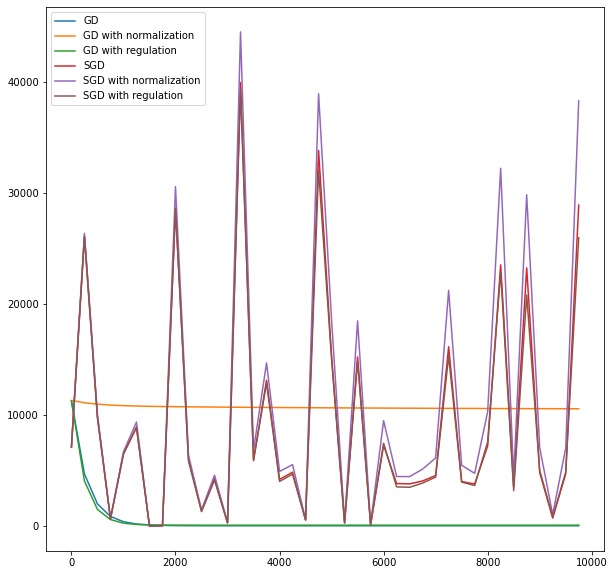

In [34]:
(
    mse_comparison
    .iloc[[i for i in range(0, 10000, 250)],:]
    .plot(figsize=[10,10])
)

<AxesSubplot:>

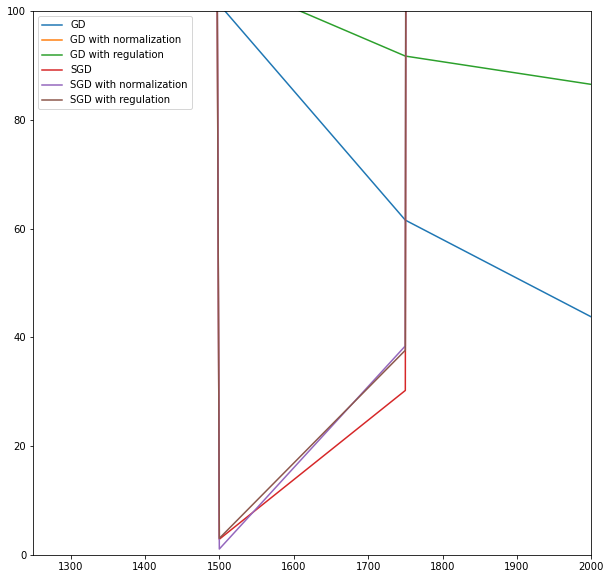

In [39]:
(
    mse_comparison
    .iloc[[i for i in range(0, 10000, 250)],:]
    .plot(figsize=[10,10], xlim=[1250,2000], ylim=[0,100])
)

### Cделать выводы о разнице скорости сходимости каждого из методов

*На синтетических данных методы SG теряют свою эфективность до 2500 итерации. При этом использование SGD дало случайно хороший результат на 1500 итерации - ошибка упала до минимальных значений.*

## Задание 2. 

### Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.  

## Задание 3. 

### Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

## Задание 4. 

### Построить график изменения весов от числа итераций при GD и SGD (или mbGD) на одном рисунке.

## Задание 5. 

### Построить график изменения весов для L1 и L2 регуляризации от коэффициента регуляризации.